# CNN Classifier for TMNIST Dataset

This Kaggle notebook outlines the creation of a CNN (Convolutional Neural Network) to classify images from the TMNIST dataset ((the "Hello World" of supervised learning in image classification).

## Approach:
The process for building and evaluating the classifier is straightforward and mirrors common practices in machine learning:

1. **Data Pre-processing:** Including normalization and identifying features and labels.
2. **Dataset Splitting:** Dividing the data into training, validation, and testing sets.
3. **Model Training:** Using a CNN built with TensorFlow.
4. **Model Evaluation:** Assessing performance and accuracy.

## Model Overview:
The simple model contains **2 convolutional layers** to train the NN to classify images with an accuracy of around 94%.

#### This Notebook Requires:
- Including the dataset
- Enable GPU with notebook
- Installing packages

#### Import Packages

In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv


In [83]:
# For Model training 
import tensorflow as tf

# For data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# For plotting images and loss
import matplotlib.pyplot as plt

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

#### Read Dataset

In [84]:
# Read csv file
df = pd.read_csv("/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv")
df.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Current shape of dataframe with all columns
df.shape

(274093, 786)

#### Visualize Images

The 1D array of 784 pixel values is reshaped into a 2D array of 28x28 dimensions to visualize the image.

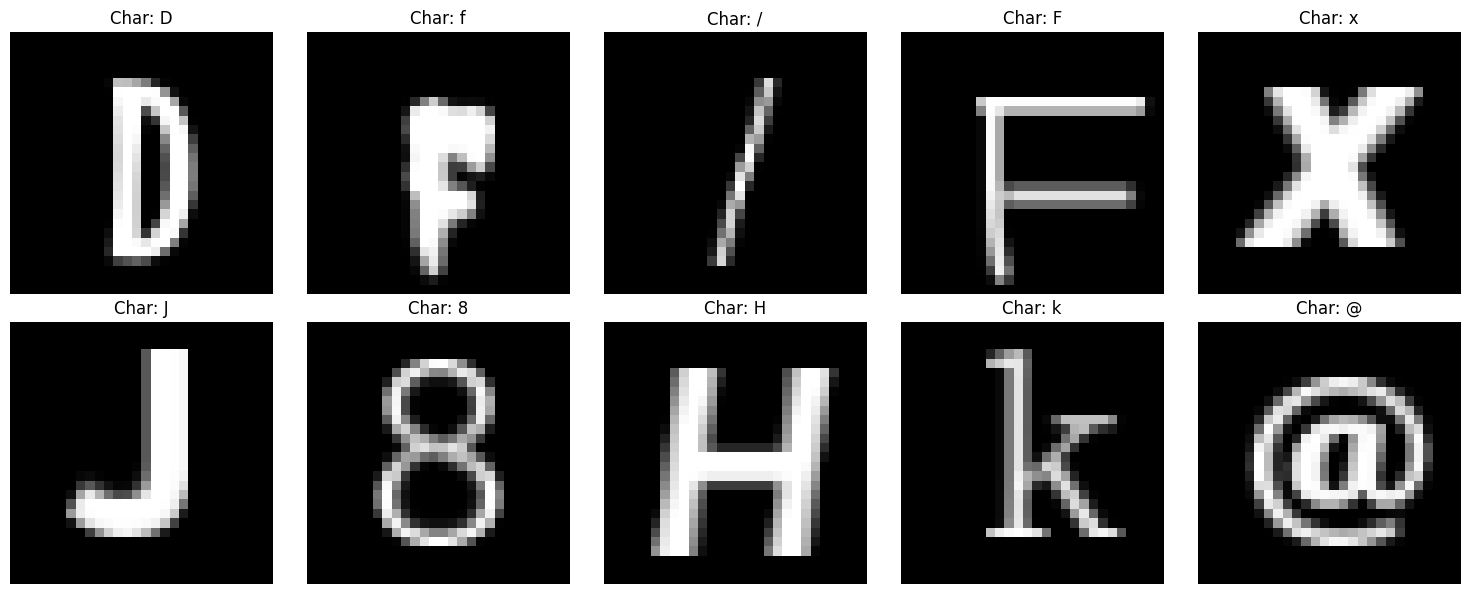

In [86]:
# Setting up the figure and axes for a 2x5 grid of images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the first 10 images in dataset
for i in range(1, 11):
    # Select a row to visualize
    image_data = df.iloc[i, 2:].values  # Skipping 'labels' column

    # Reshape the flat array into a 28x28 2D array
    image_array = image_data.reshape(28, 28).astype('float32')
    
    # Plot the image on the corresponding subplot
    ax = axes[i-1]
    ax.imshow(image_array, cmap='gray')  # Use gray scale color map
    ax.set_title(f"Char: {df.iloc[i, 1]}")  # Assuming the second column is 'labels'
    ax.axis('off')  # Turn off axis numbers and ticks

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure with the subplots
plt.show()

### Data Pre-processing

**Features**: A CNN requires the features to be in **matrix form (28 x 28)**, not flattened, to effectively apply convolutional filters.

**Labels**: It is crucial to one-hot encode the Labels as this aligns with the **network's output**, which is needed in order to pass it through the **softmax activation function** to obtain a probability distribution across all classes.

In [87]:
# Removing font names from dataframe
df.drop(columns="names", inplace=True)
df.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Initialize labels and features (pixel values) array
labels = df['labels'].values
features = df.iloc[:, 1:].values

#### Feature Processing

In [89]:
# Normalize the features (pixel values) to range from 0 to 1
features = features / 255.0

# Reshape to accomodate for a 28 x 28 2D image
features = features.reshape(-1, 28, 28, 1)

#### Encode Labels

In [90]:
# Label Encode the labels column
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

# You can also create a reverse mapping if needed, from encoded number to label
number_to_label_mapping = {i: label for i, label in enumerate(encoder.classes_)}

# One hot encode each of the labels
y_one_hot = tf.one_hot(indices=encoded_labels, depth=94)

# Convert tensor to numpy array
y_one_hot_np = y_one_hot.numpy()

#### Training, Validation and Test Split

In [91]:
# 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(features, y_one_hot_np, test_size=0.2, random_state=42)

# 50-50 split for validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

### Sequential Model Setup

The Sequential Model tells you the order in which we go from input data to output prediction:

1. **Convolutional Layers**:
- **First Convolutional Layer**: Consists of 32 filters with a size of 3x3. The ReLU activation function is applied to introduce non-linearity. The input to this layer is the 28x28 grayscale image.
- **Second Convolutional Layer**: Has 64 filters, with all other parameters remaining the same as the first layer.
2. **Max Pooling Layers**:
- Applied after each convolutional layer.
- Reduces the spatial dimensions of the feature maps based on a 2x2 pool size and a defined stride (step).
3. **Flatten Layer**:
- The output from the second max-pooled layer is flattened into a 1D vector.
4. **Fully Connected Classifier**:
- **First Dense Layer (Fully Connected)**: Consists of 128 neurons and applies the ReLU activation function.
- **Dropout Layer**: Applied to regularize the network and prevent overfitting. A dropout rate of 0.5 meaning half of the neurons will be randomly dropped out during training.
- **Second Dense Layer (Output Layer)**: 94 neurons, corresponding to the 94 different classes in the dataset. The softmax activation function is applied to output probabilities for each class.

- Changing some of the hyperparameter values results in signficant differences in accuracy.

In [92]:
# Two Conv2D layers are set up to train the model using relu activation function,
# maxpooling and 50% of neurons turned off for regularization
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    
    # First convolutional layer
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    
    # Fully connected classifier
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(94, activation='softmax')
])

### Model Compile

1. **Optimizer: Adam**: Dynamically adjusts the learning rate during training.
2. **Loss Function: Categorical Cross-Entropy**: Difference between the predicted probability distribution and the true probability distribution of the classes. In the case of multiple classes, each class is treated as a separate binary classification problem, and the loss is calculated for each class independently.
3. **Metrics: Accuracy**: Proportion of correctly classified samples out of the total number of samples.

In [93]:
custom_adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

# Compiled using Adam optimzer, cross entropy loss and accuracy as the metrics used to evaluate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Early Stopping

In [94]:
# Setup early stopping of the model to avoid overfitting
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

### Train the CNN:
1. **Batch Size**: Number of training examples utilized in one **iteration**. One iteration refers to a single update of the model's parameters based on the data in one batch.
2. **Epoch**: After one iteration, the process repeats with a new batch of data, and the model continues to update its parameters until it has seen **all the training data (one epoch)**.

In [95]:
EPOCHS = 10

# Training for 10 epochs, with validation accuracy calculated every two epochs
history = model.fit(X_train, y_train, batch_size=64, epochs=EPOCHS, callbacks=callbacks, validation_data=(X_val, y_val), validation_freq=2)

Epoch 1/10
  43/3427 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0783 - loss: 4.2264     

W0000 00:00:1712700617.243415      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3427/3427 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7658 - loss: 0.8778
Epoch 2/10
  43/3427 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9027 - loss: 0.3090

W0000 00:00:1712700629.453994      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3420/3427 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9121 - loss: 0.2823

W0000 00:00:1712700640.211093      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3427/3427 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9121 - loss: 0.2823 - val_accuracy: 0.9312 - val_loss: 0.2234
Epoch 3/10
  49/3427 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9189 - loss: 0.2337

W0000 00:00:1712700641.143515      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3427/3427 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9264 - loss: 0.2286
Epoch 4/10
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9343 - loss: 0.1986 - val_accuracy: 0.9365 - val_loss: 0.2023
Epoch 5/10
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9401 - loss: 0.1773
Epoch 6/10
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9439 - loss: 0.1621 - val_accuracy: 0.9398 - val_loss: 0.1921
Epoch 7/10
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9486 - loss: 0.1479
Epoch 8/10
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9520 - loss: 0.1368 - val_accuracy: 0.9441 - val_loss: 0.1854
Epoch 9/10
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9536 - loss: 0.1294
Epoch 10/10
3427/3427 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9561 - loss: 0.1231 - val_accuracy: 0.9430 - val_loss: 0.1923


#### Model Evaluation

In [96]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

 96/857 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1927

W0000 00:00:1712700723.536302      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9453 - loss: 0.1876
Test accuracy: 94.43%


W0000 00:00:1712700725.171564      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


#### Plot Loss and Accuracy of Model

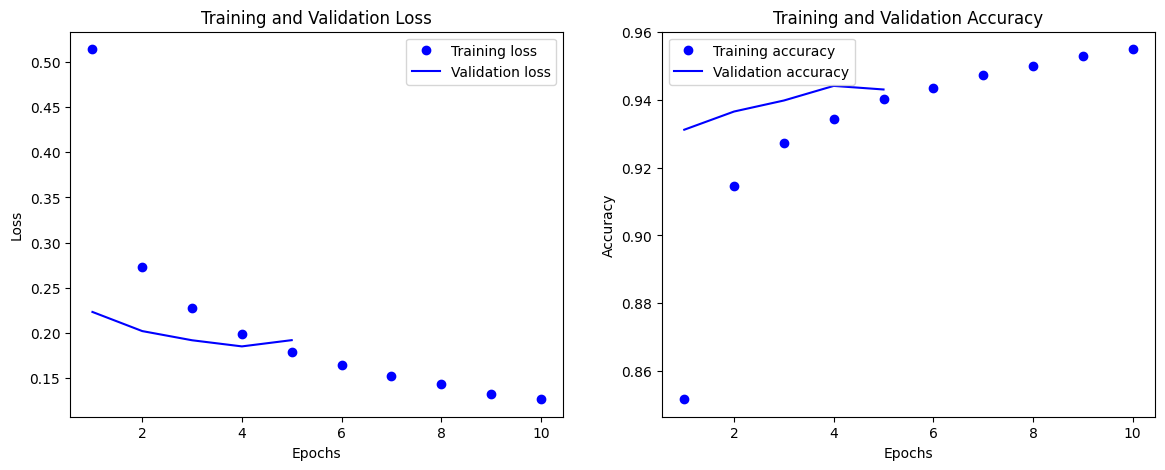

In [97]:
# Plot loss and accuracy of model

# Assuming `history` is the returned object from `model.fit()`
history_dict = history.history

# Extract the loss and accuracy for training and validation sets
loss_values = history_dict['loss']
val_loss_values = history_dict.get('val_loss', [])  # Use get to avoid KeyError if no validation
accuracy = history_dict['accuracy']
val_accuracy = history_dict.get('val_accuracy', [])  # Same as above

epochs = range(1, len(loss_values) + 1)
val_epochs = range(1, len(val_loss_values) + 1)

# Plotting Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
if val_loss_values:
    plt.plot(val_epochs, val_loss_values, 'b', label='Validation loss')  # Use val_epochs for validation
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
if val_accuracy:
    plt.plot(val_epochs, val_accuracy, 'b', label='Validation accuracy')  # Similarly, use val_epochs
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


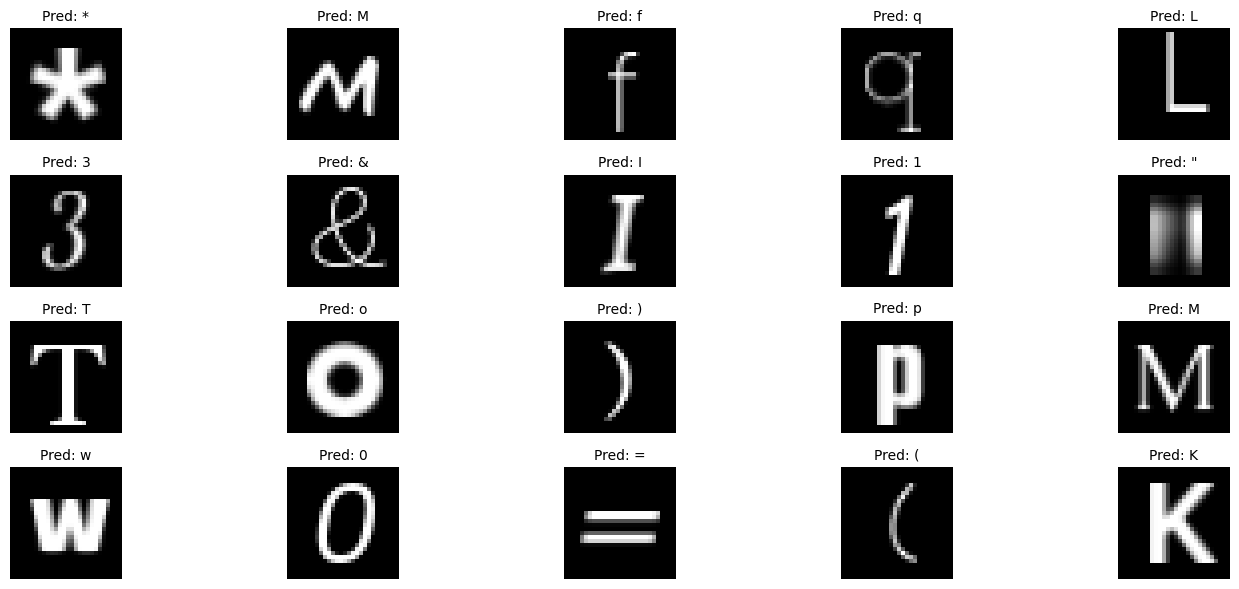

In [98]:
# Setting up the figure and axes for a 2x5 grid of images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 6))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the first 10 images in the test set
for i in range(20):
    # Reshape the input image for prediction
    input_image = X_test[i].reshape(-1, 28, 28, 1).astype('float32')

    # Make predictions using the model
    predictions = model.predict(input_image)

    # Get the predicted class label (encoded number)
    predicted_class = np.argmax(predictions)

    # Map the predicted class (encoded number) back to its original label
    predicted_label = number_to_label_mapping[predicted_class]

    # Reshape the flat array into a 28x28 2D array for display
    image_array = X_test[i].reshape(28, 28)

    # Use the specific subplot axis for showing image and title
    axes[i].imshow(image_array, cmap='gray')  # Use grayscale color map
    axes[i].set_title(f"Pred: {predicted_label}", fontsize=10)  # Display predicted label
    axes[i].axis('off')  # Turn off axis numbers and ticks

plt.tight_layout()
plt.show()

### Conclusion

The basic neural network architecture comprising two convolutional layers achieved a test set prediction accuracy of 94.43%. When experimenting with various learning rates and adjusting the number of neurons in the dense layers, distinct accuracy values were observed.

### References

- Tensorflow Documentation
- MIT 6.S191: Convolutional Neural Networks (YouTube Video)
- ChatGPT